# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.127572e+01     7.614549e+00
 * time: 0.003976106643676758
     1     3.103333e+01     6.301341e+00
 * time: 0.012543916702270508
     2     1.713262e+01     3.875028e+00
 * time: 0.03705096244812012
     3     1.356813e+01     1.276018e+00
 * time: 0.057702064514160156
     4     1.220555e+01     1.840954e+00
 * time: 0.0789179801940918
     5     1.142924e+01     1.834843e+00
 * time: 0.09537911415100098
     6     1.055089e+01     1.377255e+00
 * time: 0.11124706268310547
     7     9.991027e+00     1.007226e+00
 * time: 0.12645697593688965
     8     9.692934e+00     5.588291e-01
 * time: 0.1815199851989746
     9     9.517808e+00     6.483228e-01
 * time: 0.19699788093566895
    10     9.458115e+00     9.472339e-01
 * time: 0.2084050178527832
    11     9.396795e+00     6.002080e-01
 * time: 0.2196049690246582
    12     9.344350e+00     6.197296e-01
 * time: 0.23118305206298828
    13     9.260939e+00     4.842055e-01
 * time: 

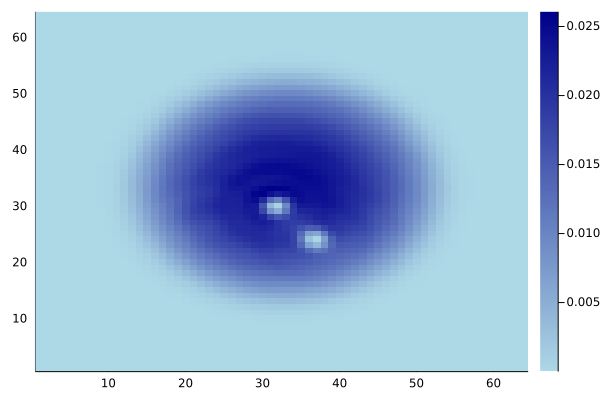

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)